<a/ id='top'></a>

# CSCI4022 Homework 3; K-Means

## Due Friday, February 24 at 11:59 pm to Canvas and Gradescope

#### Submit this file as a .ipynb with *all cells compiled and run* to the associated dropbox.

***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.
- There are two ways to quickly make a .pdf out of this notebook for Gradescope submission.  Either:
 - Use File -> Download as PDF via LaTeX.  This will require your system path find a working install of a TeX compiler
 - Easier: Use File ->  Print Preview, and then Right-Click -> Print using your default browser and "Print to PDF"



---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |
---


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from numpy.linalg import norm

***
<a/ id='p1'></a>
[Back to top](#top)
# Problem 1 (Theory: Distance Setup; 5 pts)

In the later portion we're going to combine two distance measures by creating an average of them.  Is this valid?

Prove the following:

If $f(x,y)$ and $g(x,y)$ are both valid distance measures mapping objects $x,y$ from *some* space to $\mathbb{R}^+$, prove that $h(x,y)=a\cdot f(x,y) + b\cdot (x,y)$ is also a valid distance measure for positive integers $a$ and $b$.


**Solution:** All 4 properties hold almost immediately.
- if $f(x,y)\geq 0$ and $g(x,y)\geq 0 \forall x,y$, then $h(x,y)=a\cdot f(x,y) + b \cdot g(x,y)\geq 0$
- if $f(x,y)=0$ and $g(x,y)=0$, then $h(x,y)=a\cdot f(x,y) + b \cdot g(x,y)=0$ (and vice versa, since this is an if and only if claim).
- if $f(x,y)=f(y,x)$ and $g(x,y)=g(y,x)$, then $h(y,x)=a\cdot f(y,x) + b g(y,x)=a\cdot f(x,y) + b \cdot g(x,y)=h(x,y)$
- if $f(x,y)\leq f(x,z)+f(y,z) \forall x,y,z$ and $g(x,y)\leq g(x,z)+g(y,z) \forall x,y,z$ then $h(x,y)=a\cdot f(x,y) + b \cdot g(x,y) \leq a\cdot  [f(x,z)+f(y,z)] + b \cdot [g(x,z)+g(y,z)]=h(x,z)+h(y,z)$

***
<a/ id='p2'></a>
[Back to top](#top)
# Problem 2 (K-Means and Initialization; 22 pts)

In the next two problems we cluster the Pokémon dataset loaded below:

In [2]:
def dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [3]:
df=pd.read_csv("pokedexg13.csv")
print(df.shape)
df.head(10)

(432, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


### A)
Write a function `kmeans` that takes in a data frame, and uses a predefined distance to run k-means until convergence.  

- Check for convergence by calculating the reconstruction error after each step, and stop when the reconstruction error has changed by no more than `tol` from the previous step.
- Choose $k$ rows from the data frame at random to be the initial centroids of the clusters

Use the in-class notebook code slide, and/or textbook to guide you.

In [4]:
# def distance(poke1,poke2):
#     return np.sqrt(np.sum((poke1-poke2)**2))


# def kmeans(df, k=4, tol=0.05): 
#     """
#     Usage: input 
#         df=data frame, 
#         k=# of clusters
#         tol=tolerance for L_2 convergance check on centroids
#     """    
#     #random centroids from data
#     clocs=np.random.choice(range(len(df)), size=k)
#     centroids = np.array([df.iloc[clocs[ki]] for ki in range(k)])
    
#     #Initialize objects for points-cluster dists, cluster assignments.
#     dists=np.zeros((k,len(df)))
#     clusters = np.array([-1]*len(df))
    
#     #index/convergence trackers
#     ii=0
#     Done=False
# #     print('initialized at: clocs, centroids')
#     while not Done: #50+ steps is fine; or a tolerance/change check is faster.
#         #convergence checks
#         centroidso=centroids.copy()
#         ii+=1
#         if ii==50: 
#             Done==True
#             print('No convergence in 50 steps')

#             #update classifications
#         #slow; list methods are slow.
# #         for j in range(len(df)):
# #             dists = [dist(df.iloc[j,0:2], cent) for cent in centroids]
# #             assignment = dists.index(min(dists))
# #             clusters[j] = assignment
# #             #update centroids
#         # .apply is a bit faster!
#         for ji in range(k): #for ji'th cluster, compute its distance to all points.
#             dists[ji,:]=df.apply(lambda x: distance(x, centroids[ji]), axis=1)
# #             print(dists[ji,:])


#         clusters=dists.argmin(axis=0)
#         #print("clusters: ", clusters)
#         #print("centroids: ", centroids)
        
#         for ji in range(k): #for ji'th cluster, compute its centroid
#             centroids[ji,:]=np.sum(df.loc[clusters==ji])/np.sum(clusters==ji)
            
#         #print("Updated centroids: ", centroids)
        
#         # #convergence checks
#         # if distance(centroids, centroidso)<tol: 
#         #     print('Done at iteration',ii, 'with change of', distance(centroids, centroidso))
#         #     Done=True
            
#     meanerror=np.sum(dists.min(axis=0)**2)/len(df) #we already had the info needed saved!
    
    
#     return centroids, clusters, meanerror

#### Consolidated version

In [5]:
def distance(poke1,poke2):
    return np.sqrt(np.sum((poke1-poke2)**2))


def kmeans(df, k=4, tol=0.05): 
    """
    Usage: input 
        df=data frame, 
        k=# of clusters
        tol=tolerance for L_2 convergance check on centroids
    """    
    #Initialize reconstruction error for 1st iteration
    prev_rec_error = np.inf
    
    #random centroids from data
    clocs=np.random.choice(range(len(df)), size=k)
    centroids = np.array([df.iloc[clocs[ki]] for ki in range(k)])
    
    #Initialize objects for points-cluster dists, cluster assignments.
    dists=np.zeros((k,len(df)))
    clusters = np.array([-1]*len(df))
    
    #index/convergence trackers
    ii=0
    Done=False
    while not Done: #50+ steps is fine; or a tolerance/change check is faster.
        #convergence checks
        centroidso=centroids.copy()
        ii+=1
        if ii==50: 
            Done==True
            print('No convergence in 50 steps')

        #update classifications
        for ji in range(k): #for ji'th cluster, compute its distance to all points.
            dists[ji,:]=df.apply(lambda x: distance(x, centroids[ji]), axis=1)

        clusters=dists.argmin(axis=0)
        
        for ji in range(k): #for ji'th cluster, compute its centroid
            centroids[ji,:]=np.sum(df.loc[clusters==ji])/np.sum(clusters==ji)
            
        #Calculate Recconstruction Error    
        rec_error = np.sum(dists.min(axis=0)**2)/len(df) #we already had the info needed saved!
        
        # #convergence check
        change_in_error = np.abs(prev_rec_error - rec_error)
        if change_in_error < tol:
            print('Done at iteration ',ii, 'with change of ', change_in_error)
            Done=True

        prev_rec_error = rec_error
    
    return centroids, clusters, rec_error

In [6]:
centroids, clusters, meanerror=kmeans(df[['HP', 'Attack', 'Defense']], k=4)

Done at iteration  12 with change of  0.0


### B) 

Use your function to cluster the generation 1-3 Pokémon into 4 groups based on their (HP, Attack, Defense) tuples.  Make a scatter plot of the resulting assignments on an (Attack, Defense) axis.

Run the function a few times: do you get the exact same clusters every time?

In [7]:
centroids, clusters, meanerror=kmeans(df[['HP', 'Attack', 'Defense']], k=4)
print('Final mean error:', meanerror)
centroids, clusters, meanerror=kmeans(df[['HP', 'Attack', 'Defense']], k=4)
print('Final mean error:', meanerror)
centroids, clusters, meanerror=kmeans(df[['HP', 'Attack', 'Defense']], k=4)
print('Final mean error:', meanerror)

Done at iteration  28 with change of  0.0
Final mean error: 1274.3935185185185
Done at iteration  13 with change of  0.0
Final mean error: 1369.8472222222222


/opt/conda/lib/python3.10/site-packages/pandas/core/series.py:917: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)


Done at iteration  21 with change of  0.0
Final mean error: 1333.726851851852


In [8]:
#Using the returned clusters, add it to the pokemon df
df['Cluster'] = clusters

In [9]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Cluster
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,3
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,2
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,385,Jirachi,Steel,Psychic,600,100,100,100,100,100,100,3,True,0
428,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True,0
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True,0
430,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True,2


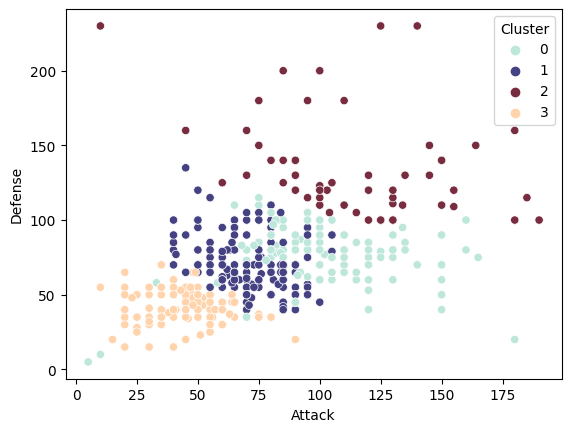

In [10]:
#Matplotlib plot
#plt.scatter(df['Attack'], df['Defense'], c=clusters)

#Seaborn plot
ax = sns.scatterplot(data=df, x='Attack',y='Defense',hue='Cluster',palette="icefire")
plt.show()

### C)

We need a way to make sure we got the *best* result for  a given value of $k$, and not a particularly unlucky one.  So in practice we usually run kmeans multiple times, and report only the best one.  So re-run your code from part **B** 20 times, and save the assignments/clusters that correspond to the lowest reconstruction error.  Make a scatter plot of the resulting assignments on an (Attack, Defense) axis.

*Implementation Idea*: Create a data frame that is 432 rows and 20 columns, fill each column with the results from a "run".  Also create a length 20 vectors for the mean reconstruction error of each run.

In [11]:
#setup
nruns=20
assignments=np.zeros((len(df), nruns))
meanerrors=np.zeros(nruns)
#do 20 runs
for ii in range(nruns):
    temp, assignments[:,ii], meanerrors[ii] =  kmeans(df[['HP', 'Attack', 'Defense']], k=4)

Done at iteration  14 with change of  0.0
Done at iteration  14 with change of  0.0
Done at iteration  19 with change of  0.0
Done at iteration  17 with change of  0.0
Done at iteration  16 with change of  0.0
Done at iteration  15 with change of  0.0
Done at iteration  20 with change of  0.0
Done at iteration  14 with change of  0.0
Done at iteration  11 with change of  0.0


/opt/conda/lib/python3.10/site-packages/pandas/core/series.py:917: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)


Done at iteration  28 with change of  0.0
Done at iteration  17 with change of  0.0
Done at iteration  24 with change of  0.0
Done at iteration  21 with change of  0.0
Done at iteration  15 with change of  0.0
Done at iteration  19 with change of  0.0
Done at iteration  14 with change of  0.0
Done at iteration  10 with change of  0.011574074074133023
Done at iteration  18 with change of  0.0
Done at iteration  11 with change of  0.0
Done at iteration  10 with change of  0.0


In [12]:
#Look at the cluster assignments - should be 20 cluster assignmens for each 432 rows
print(assignments.shape)
assignments

(432, 20)


array([[0., 0., 0., ..., 2., 3., 1.],
       [1., 2., 1., ..., 1., 3., 1.],
       [1., 2., 1., ..., 0., 0., 3.],
       ...,
       [2., 3., 2., ..., 0., 2., 3.],
       [3., 1., 3., ..., 3., 1., 2.],
       [1., 2., 1., ..., 1., 0., 3.]])

In [13]:
#Alos look at the mean errors for each iteration
print(meanerrors.shape)
meanerrors

(20,)


array([1274.20833333, 1281.2337963 , 1282.55787037, 1282.56712963,
       1269.93981481, 1275.15046296, 1280.98611111, 1274.20833333,
       1280.13425926, 1333.72685185, 1319.68981481, 1333.72685185,
       1286.44212963, 1278.63657407, 1296.34953704, 1275.89351852,
       1280.33101852, 1354.15046296, 1275.89351852, 1280.14583333])

In [14]:
#Update the 'Cluster' column so it uses the run with the minimum meanerror from our 20 iterations
df['Cluster'] = assignments[:, np.argmin(meanerrors)]

In [15]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Cluster
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0.0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,1.0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,1.0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,2.0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0.0


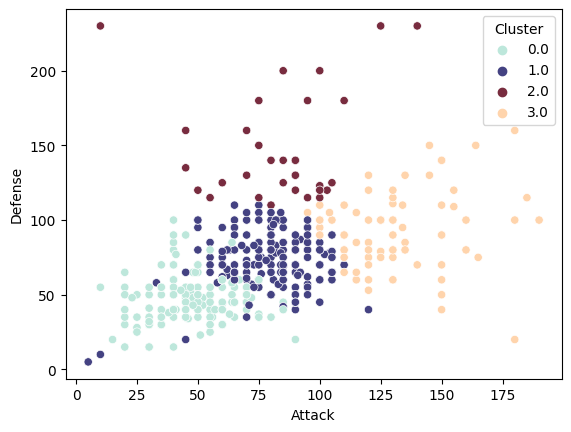

In [16]:
#Matplotlib version
# #plot the one with the best mean error
# plt.scatter(df['Attack'], df['Defense'], c=assignments[:, np.argmin(meanerrors)])


#Seaborn version
ax = sns.scatterplot(data=df, x='Attack',y='Defense',hue='Cluster',palette="icefire")
plt.show()

### D)

In parts **A-C** we left $k=4$ as the number of groups.  But we also need to pick the best value of $k$!  Run K-means for $k=1,2,3,\dots ,10$.
- For each value of $k$, run the algorithm at least 10 times with random initialization
- For each $k$, select among those runs the one with the *minimum* reconstruction error
- Make a plot where $k$ is the $x$-axis and "best observed reconstruction error" is the y-axis.

Is there a visible "elbow" in the plot?  What feels like an appropriate value of $k$, here?


In [17]:
kvals=range(1,11)
#Here doing nruns=3 for time sake
nruns=3
meanerrors=np.zeros((nruns, len(kvals)))

for kval in kvals:
    print(kval)
    for ri in range(nruns):
        temp, hold, meanerrors[ri, kval-1] =  kmeans(df[['HP', 'Attack', 'Defense']], k=kval)

1
Done at iteration  3 with change of  0.0
Done at iteration  3 with change of  0.0
Done at iteration  3 with change of  0.0
2
Done at iteration  7 with change of  0.0
Done at iteration  8 with change of  0.0
Done at iteration  5 with change of  0.0
3
Done at iteration  16 with change of  0.0
Done at iteration  21 with change of  0.0
Done at iteration  25 with change of  0.0
4
Done at iteration  19 with change of  0.0
Done at iteration  20 with change of  0.0
Done at iteration  15 with change of  0.0
5
Done at iteration  12 with change of  0.0
Done at iteration  24 with change of  0.0
Done at iteration  15 with change of  0.0
6
Done at iteration  11 with change of  0.0
Done at iteration  18 with change of  0.0
Done at iteration  20 with change of  0.0
7
Done at iteration  35 with change of  0.032407407407390565
Done at iteration  22 with change of  0.0
Done at iteration  9 with change of  0.03703703703706651
8
Done at iteration  12 with change of  0.0
Done at iteration  20 with change 

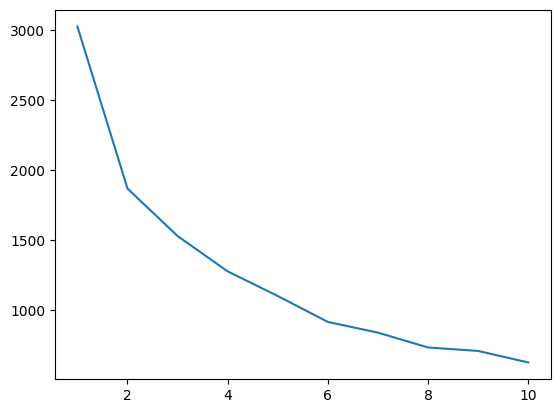

In [18]:
besterrors=np.min(meanerrors,0)
plt.plot(range(1,11), besterrors)

Not really a clear elbow, but maybe $k=2, k=5$ are solid choices?

***
<a/ id='p3'></a>
[Back to top](#top)
# Problem 3 (K-Means and Distance Measures; 18 pts)

If you don't know much about Pokémon, you should know the following:
- Mudkip is the cutest
- The "type" column matters quite a bit

... and we didn't use the "type" column!  To do so, we can modify k-means, but it requires us also define a *distance* that we can input types into.  A distance that can be calculated using categories?  Sounds like Jaccard similarity!  Suppose we decide to include the Jaccard distance (recall: it's $1-sim$) in addition to Euclidean distance.  The distance between two Pokémon is some combination of the distance between their numeric stats and the distances between their typings, just as in problem **1**!

In [19]:
#suppose we order each pokemon as a (HP, attack, def, set(types)) tuple...
def euc_distance(pokemon1, pokemon2):
    dist=np.sqrt(np.sum((pokemon1[:3]-pokemon2[:3])**2))
    return dist
def jacc_distance(pokemon1, pokemon2):
    dist=1-len(pokemon1[3].intersection(pokemon2[3]))/len(pokemon1[3].union(pokemon2[3]))
    return dist

In [20]:
#reformat for ease
pokes=np.array([[df.loc[i,'HP'],df.loc[i,'Attack'],df.loc[i,'Defense'], set([df.loc[i,'Type 1'],df.loc[i,'Type 2']])]\
                for i in range(len(df))])
#scrubs nans
for poke in pokes:
    if np.nan in poke[3]: poke[3].remove(np.nan)
        
dfp=pd.DataFrame(pokes, columns=['HP', 'Attack', 'Defense', 'Types'])
#sanity checks:
print(dfp.head(5))
print('0 to 1:', euc_distance(dfp.loc[0], dfp.loc[1]), jacc_distance(dfp.loc[0], dfp.loc[1]))
print('0 to 4:', euc_distance(dfp.loc[0], dfp.loc[4]), jacc_distance(dfp.loc[0], dfp.loc[4]))


   HP Attack Defense            Types
0  45     49      49  {Poison, Grass}
1  60     62      63  {Poison, Grass}
2  80     82      83  {Poison, Grass}
3  80    100     123  {Poison, Grass}
4  39     52      43           {Fire}
0 to 1: 24.289915602982237 0.0
0 to 4: 9.0 1.0


Using $k=4$ and at least 10 runs, cluster the Pokémon data set where the distance between two Pokémon is the *sum* of their Euclidean ($L_2$) and Jaccard distances.  Represent clusters by their centroids for numeric stats, and by the union of all of their typings for type.  Make a scatter plot of the resulting assignments on an (Attack, Defense) axis.

Does it look like typing is mattering?

In [21]:
def distance(poke1,poke2):
    return euc_distance(poke1, poke2)+jacc_distance(poke1, poke2)


def kmeans(df, k=4, tol=0.05): #only changes are in: centroids recalculation, mean recon. error.
    """
    Usage: input 
        df=data frame, 
        k=# of clusters
        tol=tolerance for L_2 convergance check on centroids
    """    
    #Initialize reconstruction error
    prev_rec_error = np.inf
    
    #random centroids from data
    clocs=np.random.choice(range(len(df)), size=k)
    centroids = np.array([df.iloc[clocs[ki]] for ki in range(k)])
       
    #Initialize objects for points-cluster dists, cluster assignments.
    dists=np.zeros((k,len(df)))
    clusters = np.array([-1]*len(df))
    
    #index/convergence trackers
    ii=0
    Done=False
#     print('initialized at: clocs, centroids')
    while not Done: #50+ steps is fine; or a tolerance/change check is faster.
        #convergence checks
        centroidso=centroids.copy()
        ii+=1
        if ii==50: 
            Done==True
            print('No convergence in 50 steps')

            #update classifications
        #slow; list methods are slow.
#         for j in range(len(df)):
#             dists = [dist(df.iloc[j,0:2], cent) for cent in centroids]
#             assignment = dists.index(min(dists))
#             clusters[j] = assignment
#             #update centroids
        # .apply is a bit faster!
        for ji in range(k): #for ji'th cluster, compute its distance to all points.
            dists[ji,:]=df.apply(lambda x: distance(x, centroids[ji]), axis=1)
#             print(dists[ji,:])
        clusters=dists.argmin(axis=0)
        for ji in range(k): #for ji'th cluster, compute its centroid
            centroids[ji,0:3]=np.sum(df.loc[clusters==ji, ['HP', 'Attack','Defense']])/np.sum(clusters==ji)
            centroids[ji,3]=set().union(*list(df.loc[clusters==ji, 'Types'])) #union all sets in the list given
       
    #     #convergence checks
    #     centdist=np.sum([distance(centroids[i],centroidso[i]) for i in range(k)])
    #     if centdist<tol: 
    #         print('Done at iteration',ii, 'with change of', centdist)
    #         Done=True
    # meanerror=np.sum(dists.min(axis=0)**2)/len(df) #we already had the info needed saved!
        # #convergence check
        
        rec_error = np.sum(dists.min(axis=0)**2)/len(df) #we already had the info needed saved!
        change_in_error = np.abs(prev_rec_error - rec_error)
        if change_in_error < tol:
            print('Done at iteration ',ii, 'with change of ', change_in_error)
            Done=True

        prev_rec_error = rec_error
    return centroids, clusters, rec_error


Done at iteration  18 with change of  0.0
Final mean error: 1359.4391137679195


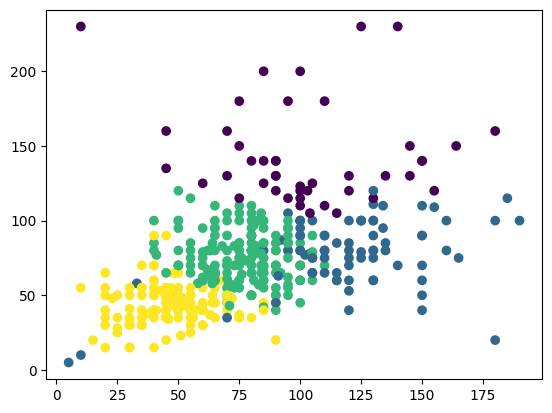

In [22]:
centroids, clusters, meanerror=kmeans(dfp, k=4)
print('Final mean error:', meanerror)
plt.scatter(df['Attack'], df['Defense'], c=clusters)

*Hint:* You can and may want to reformat the data a little, since the two "Type" columns don't naturally lend themselves well to being put into a "set" for Jaccard computation.

### B) 

Your answer in part **3A** should be "certainly not!"  Since Jaccard distances all live in $[0,1]$ and each numerical statistic can range from $[1,256]$, the distances between those stats will totally dominate Jaccard.   But that's no problem!  We can either rescale the *data*, where we shrink stats down to a $[0,1]$ or similar scale, or we can rescale our *distance* to weight some features/columns more than others.  

Suppose we decide we want to "weight" Jaccard distance $d_J$ as 90% of the calculation and keep the Euclidean stats-distance $d_E$ between Pokémon as the remaining 10%.  We could define:

$$d(x,y)=.9 d_J(x,y) + .1 d_E(x,y)$$

as our distance!

In [23]:
def combined_dist(pokemon1, pokemon2, a): #a is the "percentage" that we'll weight Jaccard
    dist=100*(1-a)*euc_distance(pokemon1, pokemon2)+100*a*jacc_distance(pokemon1, pokemon2)
    return dist

def kmeans(df, k=4, tol=0.05): #only changes are in: centroids recalculation, mean recon. error.
    """
    Usage: input 
        df=data frame, 
        k=# of clusters
        tol=tolerance for L_2 convergance check on centroids
    """    
    #Initialize reconstruction error
    prev_rec_error = np.inf
    
    #random centroids from data
    clocs=np.random.choice(range(len(df)), size=k)
    centroids = np.array([df.iloc[clocs[ki]] for ki in range(k)])
       
    #Initialize objects for points-cluster dists, cluster assignments.
    dists=np.zeros((k,len(df)))
    clusters = np.array([-1]*len(df))
    
    #index/convergence trackers
    ii=0
    Done=False
#     print('initialized at: clocs, centroids')
    while not Done: #50+ steps is fine; or a tolerance/change check is faster.
        #convergence checks
        centroidso=centroids.copy()
        ii+=1
        if ii==50: 
            Done==True
            print('No convergence in 50 steps')

            #update classifications
        #slow; list methods are slow.
#         for j in range(len(df)):
#             dists = [dist(df.iloc[j,0:2], cent) for cent in centroids]
#             assignment = dists.index(min(dists))
#             clusters[j] = assignment
#             #update centroids
        # .apply is a bit faster!
        for ji in range(k): #for ji'th cluster, compute its distance to all points.
            dists[ji,:]=df.apply(lambda x: distance(x, centroids[ji]), axis=1)
#             print(dists[ji,:])
        clusters=dists.argmin(axis=0)
        for ji in range(k): #for ji'th cluster, compute its centroid
            centroids[ji,0:3]=np.sum(df.loc[clusters==ji, ['HP', 'Attack','Defense']])/np.sum(clusters==ji)
            centroids[ji,3]=set().union(*list(df.loc[clusters==ji, 'Types'])) #union all sets in the list given
       
    #     #convergence checks
    #     centdist=np.sum([distance(centroids[i],centroidso[i]) for i in range(k)])
    #     if centdist<tol: 
    #         print('Done at iteration',ii, 'with change of', centdist)
    #         Done=True
    # meanerror=np.sum(dists.min(axis=0)**2)/len(df) #we already had the info needed saved!
        # #convergence check
        
        rec_error = np.sum(dists.min(axis=0)**2)/len(df) #we already had the info needed saved!
        change_in_error = np.abs(prev_rec_error - rec_error)
        if change_in_error < tol:
            print('Done at iteration ',ii, 'with change of ', change_in_error)
            Done=True

        prev_rec_error = rec_error
    return centroids, clusters, rec_error

Finally, using $k=4$ and at least 10 runs, cluster the Pokémon data set where the Jaccard distance between Pokemon is given a 99.5% of the weight of the distance function.

Make a scatter plot of the resulting assignments on an (Attack, Defense) axis.

In [24]:
def distance(poke1,poke2):
    return combined_dist(poke1, poke2, .9)

Done at iteration  22 with change of  0.0
Final mean error: 184533.9285297315


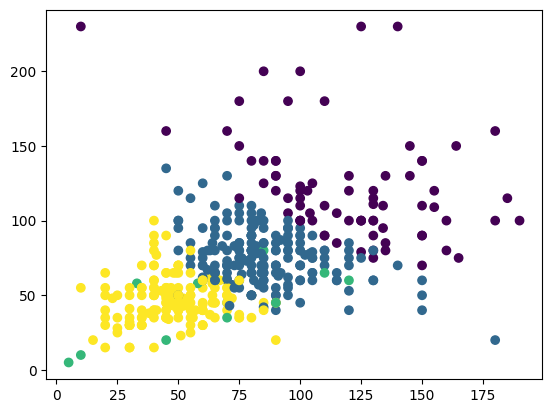

In [25]:
centroids, clusters, meanerror=kmeans(dfp, k=4)
print('Final mean error:', meanerror)
plt.scatter(df['Attack'], df['Defense'], c=clusters)

Still not really using groups: need to crank up the multiple on Jaccard!

In [31]:
def distance(poke1,poke2):
    return combined_dist(poke1, poke2, .995)

def kmeans(df, k=4, tol=0.05): #only changes are in: centroids recalculation, mean recon. error.
    """
    Usage: input 
        df=data frame, 
        k=# of clusters
        tol=tolerance for L_2 convergance check on centroids
    """    
    #Initialize reconstruction error
    prev_rec_error = np.inf
    
    #random centroids from data
    clocs=np.random.choice(range(len(df)), size=k)
    centroids = np.array([df.iloc[clocs[ki]] for ki in range(k)])
       
    #Initialize objects for points-cluster dists, cluster assignments.
    dists=np.zeros((k,len(df)))
    clusters = np.array([-1]*len(df))
    
    #index/convergence trackers
    ii=0
    Done=False
#     print('initialized at: clocs, centroids')
    while not Done: #50+ steps is fine; or a tolerance/change check is faster.
        #convergence checks
        centroidso=centroids.copy()
        ii+=1
        if ii==50: 
            Done==True
            print('No convergence in 50 steps')

            #update classifications
        #slow; list methods are slow.
#         for j in range(len(df)):
#             dists = [dist(df.iloc[j,0:2], cent) for cent in centroids]
#             assignment = dists.index(min(dists))
#             clusters[j] = assignment
#             #update centroids
        # .apply is a bit faster!
        for ji in range(k): #for ji'th cluster, compute its distance to all points.
            dists[ji,:]=df.apply(lambda x: distance(x, centroids[ji]), axis=1)
#             print(dists[ji,:])
        clusters=dists.argmin(axis=0)
        for ji in range(k): #for ji'th cluster, compute its centroid
            centroids[ji,0:3]=np.sum(df.loc[clusters==ji, ['HP', 'Attack','Defense']])/np.sum(clusters==ji)
            centroids[ji,3]=set().union(*list(df.loc[clusters==ji, 'Types'])) #union all sets in the list given
       
    #     #convergence checks
    #     centdist=np.sum([distance(centroids[i],centroidso[i]) for i in range(k)])
    #     if centdist<tol: 
    #         print('Done at iteration',ii, 'with change of', centdist)
    #         Done=True
    # meanerror=np.sum(dists.min(axis=0)**2)/len(df) #we already had the info needed saved!
        # #convergence check
        
        rec_error = np.sum(dists.min(axis=0)**2)/len(df) #we already had the info needed saved!
        change_in_error = np.abs(prev_rec_error - rec_error)
        if change_in_error < tol:
            print('Done at iteration ',ii, 'with change of ', change_in_error)
            Done=True

        prev_rec_error = rec_error
    return centroids, clusters, rec_error

Done at iteration  14 with change of  0.0
Final mean error: 11255.001667207394


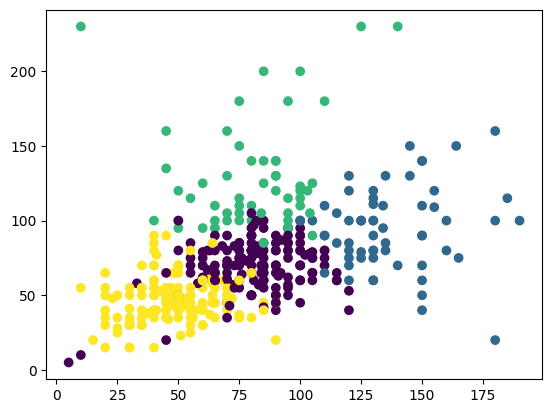

In [32]:
centroids, clusters, meanerror=kmeans(dfp, k=4)
print('Final mean error:', meanerror)
plt.scatter(df['Attack'], df['Defense'], c=clusters)

### C)

Glance over the resulting clusterings in problems 2 and 3.  How would you improve on this method?  Does it appear to be clustering in ways that make sense to you?  If you want a few places to look, consider asking:

- Are "legendary" Pokémon often clustered together?
- Are "starter" Pokémon often clustered together? (These are \# 1,4,7, 151,155,158,252,255,258)
- Should we have used more stats than just (HP, Attack, Defense)?

(Nothing specific is looked for here, but show that you explore the data and attempt to sanity check your clusters).

____

Generally speaking, it's hard to find a good balance here between the weights and passing any sanity checks.  If you choose a low weight towards the Jaccard, you'll find typing is ignored, but as you turn it up you'll maybe lose some nuance.  In supervised learning you might input your prior knowledge of legendaries/starters and try to pick the value of a that makes them recapute your prior beliefs.  For here, it's a little more abstract.

One note on Jaccard is that it's... not perfect to just create a union of *all* of the sets in a group, since it means a set with 1 dark type and 1000 water types is the same as a set with vice versa.  Maybe we should have done some kind of averaging for the set-based similarities, too!